# Độ chính xác (Accuracy)

Tỷ lệ phần trăm các dự đoán đúng.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [106]:
# load dữ liệu
data = pd.read_csv('/Users/taibeo9x/python04/big01/data-ai/data/lesson7 buoi14/kdd2004.csv')



In [107]:
# ánh xạ lại phân lớp mục tiêu thành 0 và 1
## Yêu cầu 1:
## VIẾT CODE Ở ĐÂY:
data['target'] = data['target'].map({-1:0, 1:1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [108]:
# kích thước dữ liệu

data.shape

(145751, 75)

In [109]:
# mục tiêu không cân bằng

data.target.value_counts() / len(data)

target
0    0.991108
1    0.008892
Name: count, dtype: float64

In [110]:
# tách thành tập huấn luyện và tập kiểm tra
## Yêu cầu 2:
## VIẾT CODE Ở ĐÂY:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

## Baseline: dự đoán lớp đa số

In [111]:
# Dự đoán cơ sở: dự đoán lớp đa số
## Yêu cầu 3:
## VIẾT CODE Ở ĐÂY:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

## Huấn luyện mô hình học máy
### Random Forest

In [112]:
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)
## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:
y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

### Hồi quy Logistic 

In [113]:
logit = LogisticRegression(random_state=0,  max_iter=1000)

logit.fit(X_train, y_train)
## Yêu cầu 5:
## VIẾT CODE Ở ĐÂY:
y_train_logit = logit.predict_proba(X_train)[:,1]
y_test_logit = logit.predict_proba(X_test)[:,1]

## Độ chính xác

In [114]:
## Yêu cầu 6:
## VIẾT CODE Ở ĐÂY:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
print('Accuracy Logistic Regression test:', accuracy_score(y_test, logit.predict(X_test)))

Accuracy Baseline test:  0.9907377761514888
Accuracy Random Forest test: 0.9962951104605955
Accuracy Logistic Regression test: 0.9970269404930705


Căn cứ vào độ chính xác, có vẻ như các mô hình học máy chỉ tăng một chút chất lượng so với baseline. 

## Phần trăm nhóm thiểu số được phân loại đúng

In [115]:
def return_minority_perc(y_true, y_pred):
    minority_total = np.sum(y_true)
    minority_correct = np.sum(np.where((y_true==1)&(y_pred==1),1,0))
    return minority_correct / minority_total *100

In [116]:
## Yêu cầu 7:
## VIẾT CODE Ở ĐÂY:
print('% minority correctly classified, Baseline test: ', return_minority_perc(y_test, y_test_base))
print('% minority correctly classified, Random Forest test:', return_minority_perc(y_test, rf.predict(X_test)))
print('% minority correctly classified, Regression test:', return_minority_perc(y_test, logit.predict(X_test)))

% minority correctly classified, Baseline test:  0.0
% minority correctly classified, Random Forest test: 60.24691358024692
% minority correctly classified, Regression test: 70.86419753086419


Tuy nhiên, chúng ta thấy rằng baseline không phân loại đúng bất kỳ quan sát nào của lớp thiểu số trong khi các mô hình học máy lại làm được. 

# Precision, Recall, F-measure, Support

- **Precision** = tp / (tp + fp)

- **Recall** = tp / (tp + fn)

- **F1** = 2 * (precision * recall) / (precision + recall)

- **Support** = Số trường hợp ở mỗi lớp


Precision, Recall và F-measure phụ thuộc vào ngưỡng xác suất được sử dụng để xác định kết quả phân lớp.

In [117]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

from yellowbrick.classifier import (
    ClassificationReport,
    DiscriminationThreshold,
)

## Precision

In [118]:
## Yêu cầu 8:
## VIẾT CODE Ở ĐÂY:
print('Precision Baseline test: ', precision_score(y_test, y_test_base))
print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test)))
print('Precision Logistic Regression test:', precision_score(y_test, logit.predict(X_test)))

Precision Baseline test:  0.0
Precision Random Forest test: 0.9959183673469387
Precision Logistic Regression test: 0.959866220735786


## RECALL

In [119]:
## Yêu cầu 9:
## VIẾT CODE Ở ĐÂY:
print('Recall Baseline test: ', recall_score(y_test, y_test_base, pos_label=1))
print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=1))
print('Recall Logistic Regression test:', recall_score(y_test, logit.predict(X_test), pos_label=1))


Recall Baseline test:  0.0
Recall Random Forest test: 0.6024691358024692
Recall Logistic Regression test: 0.7086419753086419


## F-measure/chỉ số F1 

In [120]:
## Yêu cầu 10:
## VIẾT CODE Ở ĐÂY:
print('F-measure Baseline test: ', f1_score(y_test, y_test_base, pos_label=1))
print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test), pos_label=1))
print('F-measure Logistic Regression test:', f1_score(y_test, logit.predict(X_test), pos_label=1))

F-measure Baseline test:  0.0
F-measure Random Forest test: 0.7507692307692309
F-measure Logistic Regression test: 0.8153409090909091


## Tất cả phép đo - 1 hàm

Chúng ta có thể dùng toàn bộ phép đo cho lớp đa số và thiểu số cùng một lúc với hàm:

- [precision_recall_fscore_support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)

In [121]:
## Yêu cầu 11:
## VIẾT CODE Ở ĐÂY:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, rf.predict(X_test), pos_label=1,
)

print('Random Forests Precision: ', precision)
print('Random Forests Recall: ', recall)
print('Random Forests f-score: ', fscore)
print('Support: ', support)

Random Forests Precision:  [0.99629723 0.99591837]
Random Forests Recall:  [0.99997692 0.60246914]
Random Forests f-score:  [0.99813368 0.75076923]
Support:  [43321   405]


Phần tử đầu tiên trong danh sách tương ứng với phép đo cho lớp đa số, phần tử thứ hai tương ứng với phép đo cho lớp thiểu số (chúng trùng với các giá trị có được khi tính toán từng phép đo riêng lẻ).

Chúng ta cũng thấy chúng khớp với các giá trị thu được với Yellowbrick bên dưới:

## Báo cáo phân loại đầu đủ

https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

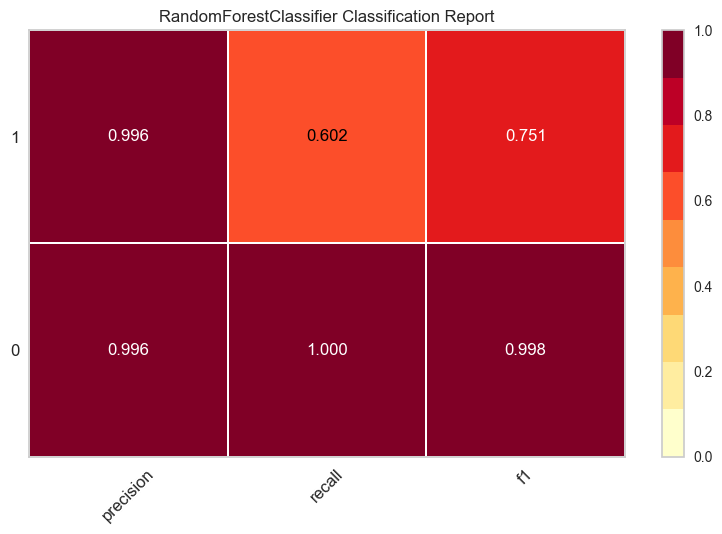

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [122]:
## Yêu cầu 12:
## VIẾT CODE Ở ĐÂY:
visualizer = ClassificationReport(rf)

visualizer.fit(X_train, y_train)        # Khớp visualizer và mô hình
visualizer.score(X_test, y_test)        # Đánh giá mô hình trên dữ liệu kiểm tra
visualizer.show()                       # Hoàn thành và hiển thị kết quả

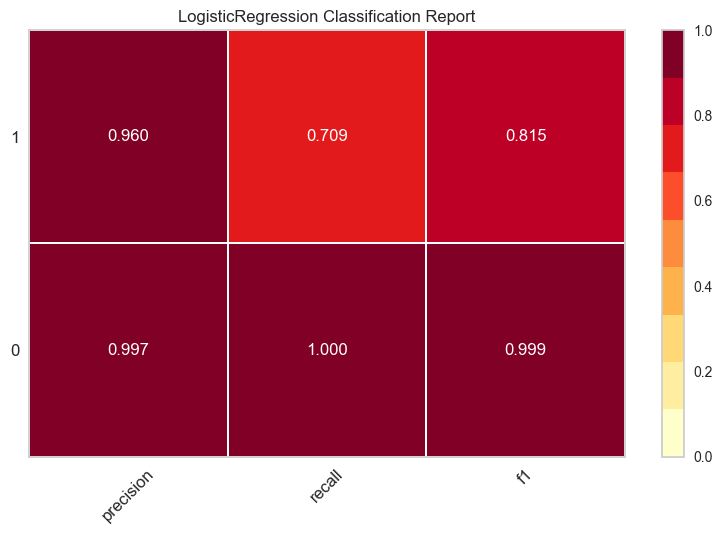

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [123]:
## Yêu cầu 13:
## VIẾT CODE Ở ĐÂY:
visualizer = ClassificationReport(logit)

visualizer.fit(X_train, y_train)        # Khớp visualizer và mô hình
visualizer.score(X_test, y_test)        # Đánh giá mô hình trên dữ liệu kiểm tra
visualizer.show() 

## Precision và Recall với ngưỡng xác suất

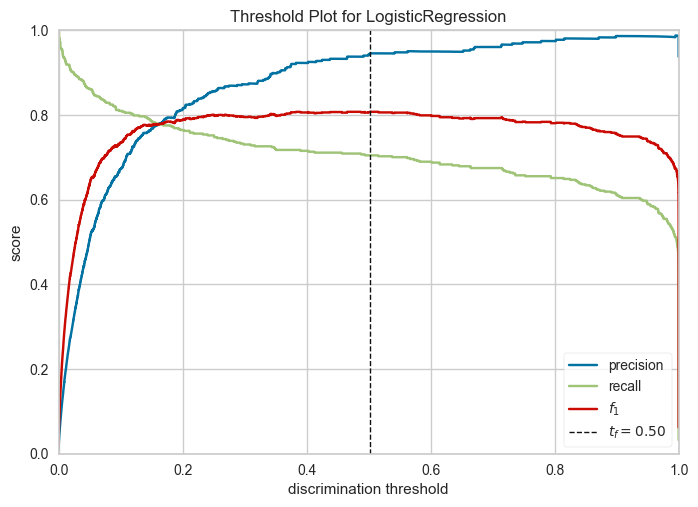

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [124]:
visualizer = DiscriminationThreshold(logit,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude = "queue_rate")

visualizer.fit(X_train, y_train)        # Khớp visualizer và mô hình
visualizer.score(X_test, y_test)        # Đánh giá mô hình trên dữ liệu kiểm tra
visualizer.show()

# Ma trận nhầm lẫn, false positive rate (FPR) và false negative rate (FNR)

- **FPR** = fp / (tn + fp)

- **FNR** = fn / (tp + fn)


Ma trận nhầm lẫn, FPR và FNR phụ thuộc vào ngưỡng xác suất được sử dụng để xác đinh kết quả phân lớp.

In [125]:
from sklearn.metrics import confusion_matrix

## Ma trận nhầm lẫn

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

TN | FP

FN | TP

### BASELINE

In [126]:
## Yêu cầu 14:
## VIẾT CODE Ở ĐÂY:
confusion_matrix(y_test,y_test_base, labels=[0,1])

array([[43321,     0],
       [  405,     0]])

### Hồi quy Logistic

In [127]:
## Yêu cầu 16:
## VIẾT CODE Ở ĐÂY:
confusion_matrix(y_test, logit.predict(X_test), labels=[0,1])

array([[43309,    12],
       [  118,   287]])

# FPR và FNR

In [128]:
## Yêu cầu 17:
## VIẾT CODE Ở ĐÂY:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_base, labels=[0,1]).ravel()

FPR = fp/(tn + fp)

FNR = fn/(tp + fn)

print('False Positive Rate, baseline: ', FPR)
print('False Negative Rate, baseline: ', FNR)

False Positive Rate, baseline:  0.0
False Negative Rate, baseline:  1.0


In [129]:
## Yêu cầu 18:
## VIẾT CODE Ở ĐÂY:
tn, fp, fn, tp = confusion_matrix(y_test, rf.predict(X_test), labels=[0,1]).ravel()

FPR = fp/(tn + fp)

FNR = fn/(tp + fn)

print('False Positive Rate, Random Forests: ', FPR)
print('False Negative Rate, Random Forests: ', FNR)

False Positive Rate, Random Forests:  2.3083492994159875e-05
False Negative Rate, Random Forests:  0.39753086419753086


In [130]:
## Yêu cầu 19:
## VIẾT CODE Ở ĐÂY:
tn, fp, fn, tp = confusion_matrix(y_test, logit.predict(X_test), labels=[0,1]).ravel()

FPR = fp/(tn + fp)

FNR = fn/(tp + fn)

print('False Positive Rate, Logistic Regression: ', FPR)
print('False Negative Rate, Logistic Regression: ', FNR)

False Positive Rate, Logistic Regression:  0.0002770019159299185
False Negative Rate, Logistic Regression:  0.291358024691358


## FPR và FNR với ngưỡng xác suất


In [131]:
thresholds = np.linspace(0, 1, 100)
thresholds

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [132]:
fpr_ls = []
fnr_ls = []

# lấy xác suất
probs = logit.predict_proba(X_test)[:,1]

for threshold in thresholds:   
    
    # lấy dự đoán lớp dựa trên ngưỡng
    ## Yêu cầu 20:
    ## VIẾT CODE Ở ĐÂY:
    preds = np.where(probs>= threshold, 1, 0)
    
    # lấy ma trận nhầm lẫn
    tn, fp, fn, tp = confusion_matrix(y_test, preds, labels=[0,1]).ravel()
    
    #  lấy FRP và FNR
    FPR = ...
    FNR = ...
    fpr_ls.append(FPR)
    fnr_ls.append(FNR)
    
metrics = pd.concat([
    pd.Series(fpr_ls),
    pd.Series(fnr_ls)], axis=1)

metrics.columns = ['fpr', 'fnr']
metrics.index = thresholds

metrics.head()

,fpr,fnr
0.000000,Ellipsis,Ellipsis
0.010101,Ellipsis,Ellipsis
0.020202,Ellipsis,Ellipsis
0.030303,Ellipsis,Ellipsis
0.040404,Ellipsis,Ellipsis


Text(0.5, 1.0, 'FPR and FNR vs Discriminant Threshold')

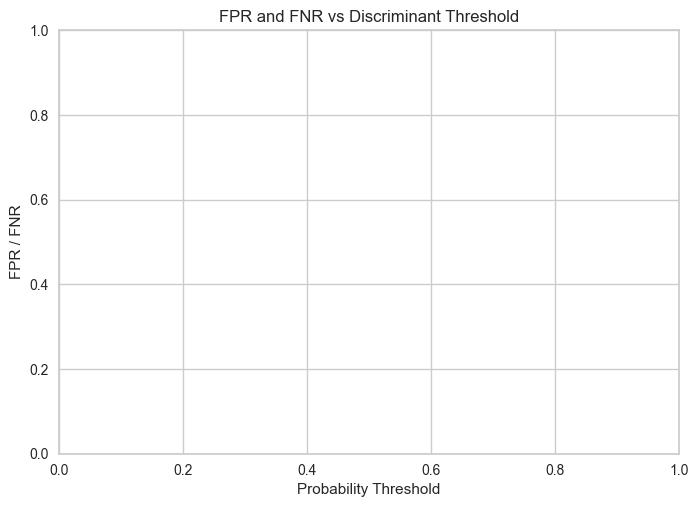

In [133]:
metrics
plt.xlabel('Probability Threshold')
plt.ylabel('FPR / FNR')
plt.title('FPR and FNR vs Discriminant Threshold')

# Đường cong Precision-Recall

In [136]:
from sklearn.metrics import plot_p

from yellowbrick.classifier import PrecisionRecallCurve

ImportError: cannot import name 'plot_precision_curve' from 'sklearn.metrics' (/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

## Đường cong Precision-Recall

### Sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_precision_recall_curve.html#sklearn.metrics.plot_precision_recall_curve

In [135]:
## Yêu cầu 21:
## VIẾT CODE Ở ĐÂY:
rf_disp = plot_recall_fscore_support(rf, X_test, y_test)
logit_disp = precision_recall_fscore_support(logit, X_test, y_test)

TypeError: too many positional arguments